<a href="https://colab.research.google.com/github/Soumi7/PG-StockManagement/blob/master/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from pycaret.utils import enable_colab 
enable_colab()

Colab mode activated.


In [51]:
df_master= pd.read_csv("/content/drive/My Drive/final.csv")

In [52]:
df_master.head()

,Unnamed: 0,date,sku,group,name,quantity,unit_cogs,agg_cogs,unit_revenue,gross_margin,sunrise,sunset,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
0,0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,"1,77",1.77,2.57,31.13,08:52 AM,04:31 PM,6,79,89,8,5.5
1,1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1.0,"3,2",3.20,5.68,43.66,08:52 AM,04:31 PM,6,79,89,8,5.5
2,2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,"2,68",10.72,3.80,29.47,08:52 AM,04:31 PM,6,79,89,8,5.5
3,3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,"2,68",10.72,3.80,29.47,08:52 AM,04:31 PM,6,79,89,8,5.5
4,4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,"2,68",10.72,2.85,5.96,08:52 AM,04:31 PM,6,79,89,8,5.5


In [53]:
df= df_master

In [54]:
df=df.drop(df.columns[0],axis=1)

In [55]:
df["unit_cogs"]=df["agg_cogs"]/df["quantity"]

In [57]:
df["quantity"]=df["quantity"].apply(pd.to_numeric)

In [58]:
df=df.drop(["agg_cogs","unit_revenue","gross_margin",],axis=1)

In [59]:
df.head()

,date,sku,group,name,quantity,unit_cogs,sunrise,sunset,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,1.77,08:52 AM,04:31 PM,6,79,89,8,5.5
1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1.0,3.20,08:52 AM,04:31 PM,6,79,89,8,5.5
2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5


In [61]:
hol = pd.read_csv('https://raw.githubusercontent.com/Soumi7/PG-StockManagement/master/holidays.csv?token=AMHKCTYQQN3G72SX4DPF6226XPAUK')
# hol
# type(hol["date"])

def encoding(data):
    holi_num=[]
    for holi in data["isholiday"]:
        if holi =="yes":
            holi_num.append(1)
            # print('y')
        else:
            holi_num.append(0)
            # print('no')
    return holi_num       

hol["isholnum"]=encoding(hol)        
hol=hol.drop("isholiday",axis=1)

In [62]:
hol

,date,isholnum
0,2018-01-01,1
1,2018-01-02,0
2,2018-01-03,0
3,2018-01-04,0
4,2018-01-05,0
5,2018-01-06,1
6,2018-01-07,1
7,2018-01-08,0
8,2018-01-09,0
9,2018-01-10,0


In [63]:
df_merge2=pd.merge(hol,df,how="left",on="date")

In [38]:
df_merge2.to_csv("final2.csv")


In [64]:
gb=df_merge2.groupby(["group"])
gb.first()

,date,isholnum,sku,name,quantity,unit_cogs,sunrise,sunset,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
group,,,,,,,,,,,,,
ART._HYGIENIC,2018-01-01,1,3646,BELLA HERBS 12 Z WERBENA,1.00,2.390000,08:52 AM,04:31 PM,6,79,89,8,5.5
ARTICLE_OF_HOUSEHOLD,2018-01-01,1,6703,BIBULA KOLOR,2.00,0.750000,08:52 AM,04:31 PM,6,79,89,8,5.5
BEER,2018-01-01,1,17506,PIWO BOJAN WIELKOP.0_5 L B/ZW,3.00,2.500000,08:52 AM,04:31 PM,6,79,89,8,5.5
BREAD,2018-01-01,1,14220,B BABKA DUZA JOGURTOWA/POLEWA,1.00,7.310000,08:52 AM,04:31 PM,6,79,89,8,5.5
CANNED_PATE,2018-01-01,1,496,BRZOSKWINIE SANDRA 820G,9.00,3.770000,08:52 AM,04:31 PM,6,79,89,8,5.5
CHEMISTRY,2018-01-01,1,5307,PATYCZKI BELLA 200,1.00,1.770000,08:52 AM,04:31 PM,6,79,89,8,5.5
CHEWING_GUM_LOLIPOPS,2018-01-01,1,4690,DROPS HALLS MENTOL LUPTUS,12.00,1.350000,08:52 AM,04:31 PM,6,79,89,8,5.5
CHIPS_FLAKES,2018-01-01,1,3441,CHETOS MINIONKI 80 G,4.00,2.120000,08:52 AM,04:31 PM,6,79,89,8,5.5
CIGARETTES,2018-01-01,1,1835,BLOK RYSUNKOWY KOLOR,1.00,1.220000,08:52 AM,04:31 PM,6,79,89,8,5.5


In [65]:
gb.corr()

isholnum       sku  \
group                                                                      
ART._HYGIENIC                             isholnum    1.000000  0.018287   
                                          sku         0.018287  1.000000   
                                          quantity   -0.058305 -0.355237   
                                          unit_cogs   0.023199  0.524652   
                                          HeatIndexC  0.484585 -0.050915   
                                          cloudcover  0.247026 -0.074276   
                                          humidity    0.364985 -0.042473   
                                          tempC       0.519277 -0.053321   
                                          Avgtemp     0.436662 -0.061590   
ARTICLE_OF_HOUSEHOLD                      isholnum    1.000000  0.106889   
                                          sku         0.106889  1.000000   
                                          quantity   -0.059372  0.036103   
                                          unit_cogs  -0.174066 -0.668497   
                                          HeatIndexC  0.308406 -0.003657   
                                          cloudcover  0.074751 -0.153836   
                                          humidity    0.137220 -0.175664   
                                          tempC       0.355813  0.034004   
                                          Avgtemp     0.252973  0.024616   
BEER                                      isholnum    1.000000 -0.020709   
                                          sku        -0.020709  1.000000   
                                          quantity    0.012780 -0.237147   
                                          unit_cogs  -0.020565  0.215090   
                                          HeatIndexC  0.434759 -0.078223   
                                          cloudcover  0.258880 -0.081220   
                                          humidity    0.390414 -0.082515   
                                          tempC       0.470174 -0.073144   
                                          Avgtemp     0.381171 -0.077353   
BREAD                                     isholnum    1.000000 -0.029985   
                                          sku        -0.029985  1.000000   
                                          quantity   -0.006520 -0.017710   
                                          unit_cogs  -0.005689  0.049243   
                                          HeatIndexC  0.471982 -0.036171   
                                          cloudcover  0.256003 -0.039334   
                                          humidity    0.371417 -0.041192   
                                          tempC       0.507404 -0.035914   
                                          Avgtemp     0.418499 -0.035821   
CANNED_PATE                               isholnum    1.000000 -0.009367   
                                          sku        -0.009367  1.000000   
                                          quantity    0.039853 -0.186139   
                                          unit_cogs  -0.065154  0.184446   
                                          HeatIndexC  0.502091 -0.025184   
                                          cloudcover  0.301046 -0.030991   
                                          humidity    0.391160 -0.006946   
                                          tempC       0.532710 -0.020405   
                                          Avgtemp     0.454880 -0.025685   
CHEMISTRY                                 isholnum    1.000000 -0.044565   
                                          sku        -0.044565  1.000000   
                                          quantity   -0.003851 -0.029020   
                                          unit_cogs   0.000043  0.022570   
                                          HeatIndexC  0.481115 -0.074068   
                                          cloudcover  0.291657 -0.072361   
                          

(array([8703., 1885., 2965., 3125.,  644., 1691., 1317.,  951.,  798.,
        1101.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <a list of 10 Patch objects>)

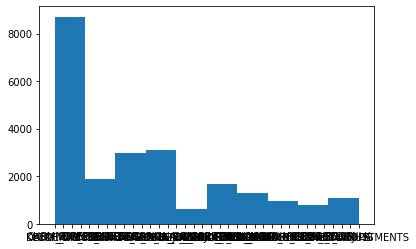

In [68]:
plt.hist(df["group"])

#Cleaning the data done EXCEPT FOR SCALING. Now going to import classifiers and check the best. 

In [27]:
from pycaret.regression import *
mod1=setup(data=df,target="quantity",numeric_features=["unit_cogs","HeatIndexC","cloudcover","humidity","tempC"],normalize=True,high_cardinality_features =["name"])
compare_models()

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:01:45
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
date,Date
sku,Numeric
group,Categorical
name,Categorical
quantity,Label
unit_cogs,Numeric
sunrise,Date
sunset,Date
HeatIndexC,Numeric
cloudcover,Numeric


KeyboardInterrupt: ignored

In [0]:
#model creation
rf=create_model('lightgbm')